# 실습 내용

- Cars 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [3]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/cars.csv'
path = 'https://bit.ly/CarsFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [4]:
# 상위 몇 개 행 확인
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [5]:
# 하위 몇 개 행 확인
data.tail()

,speed,dist
45,24,70
46,24,92
47,24,93
48,24,120
49,25,85


In [6]:
# 기술통계 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [7]:
# NaN 값 확인
data.isnull().sum()

speed    0
dist     0
dtype: int64

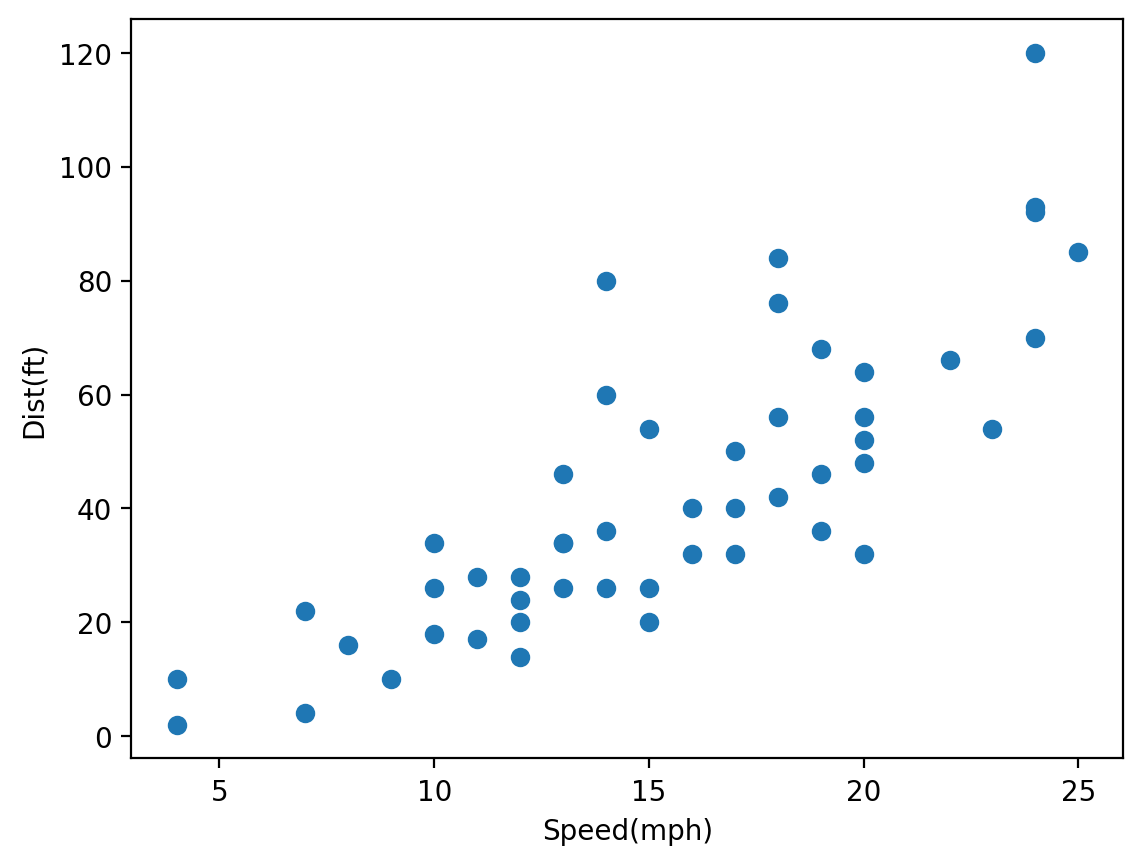

In [8]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [9]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [10]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [11]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [12]:
# 2단계: 선언하기
model = LinearRegression()

In [13]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [17]:
# 5단계: 평가하기
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('R2 : ', r2_score(y_test, y_pred))

MAE :  15.113442990354987
R2 :  0.5548332681132087


- 회귀 계수를 살펴봅니다.

In [19]:
# 회귀계수 확인
print('가중치(기울기) :', model.coef_)
print('편향(y 절편) :', model.intercept_)

가중치(기울기) : [3.91046344]
편향(y 절편) : -16.373364149357656


$$\Large Distance = -16.37 + 3.91 * Speed $$

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

In [30]:
# 회귀식 만들기
a = model.coef_
b = model.intercept_
speed = np.linspace(x_test.min(), x_test.max(), 10)
dist = a * speed + b

Text(0.5, 0, 'speed(mph)')

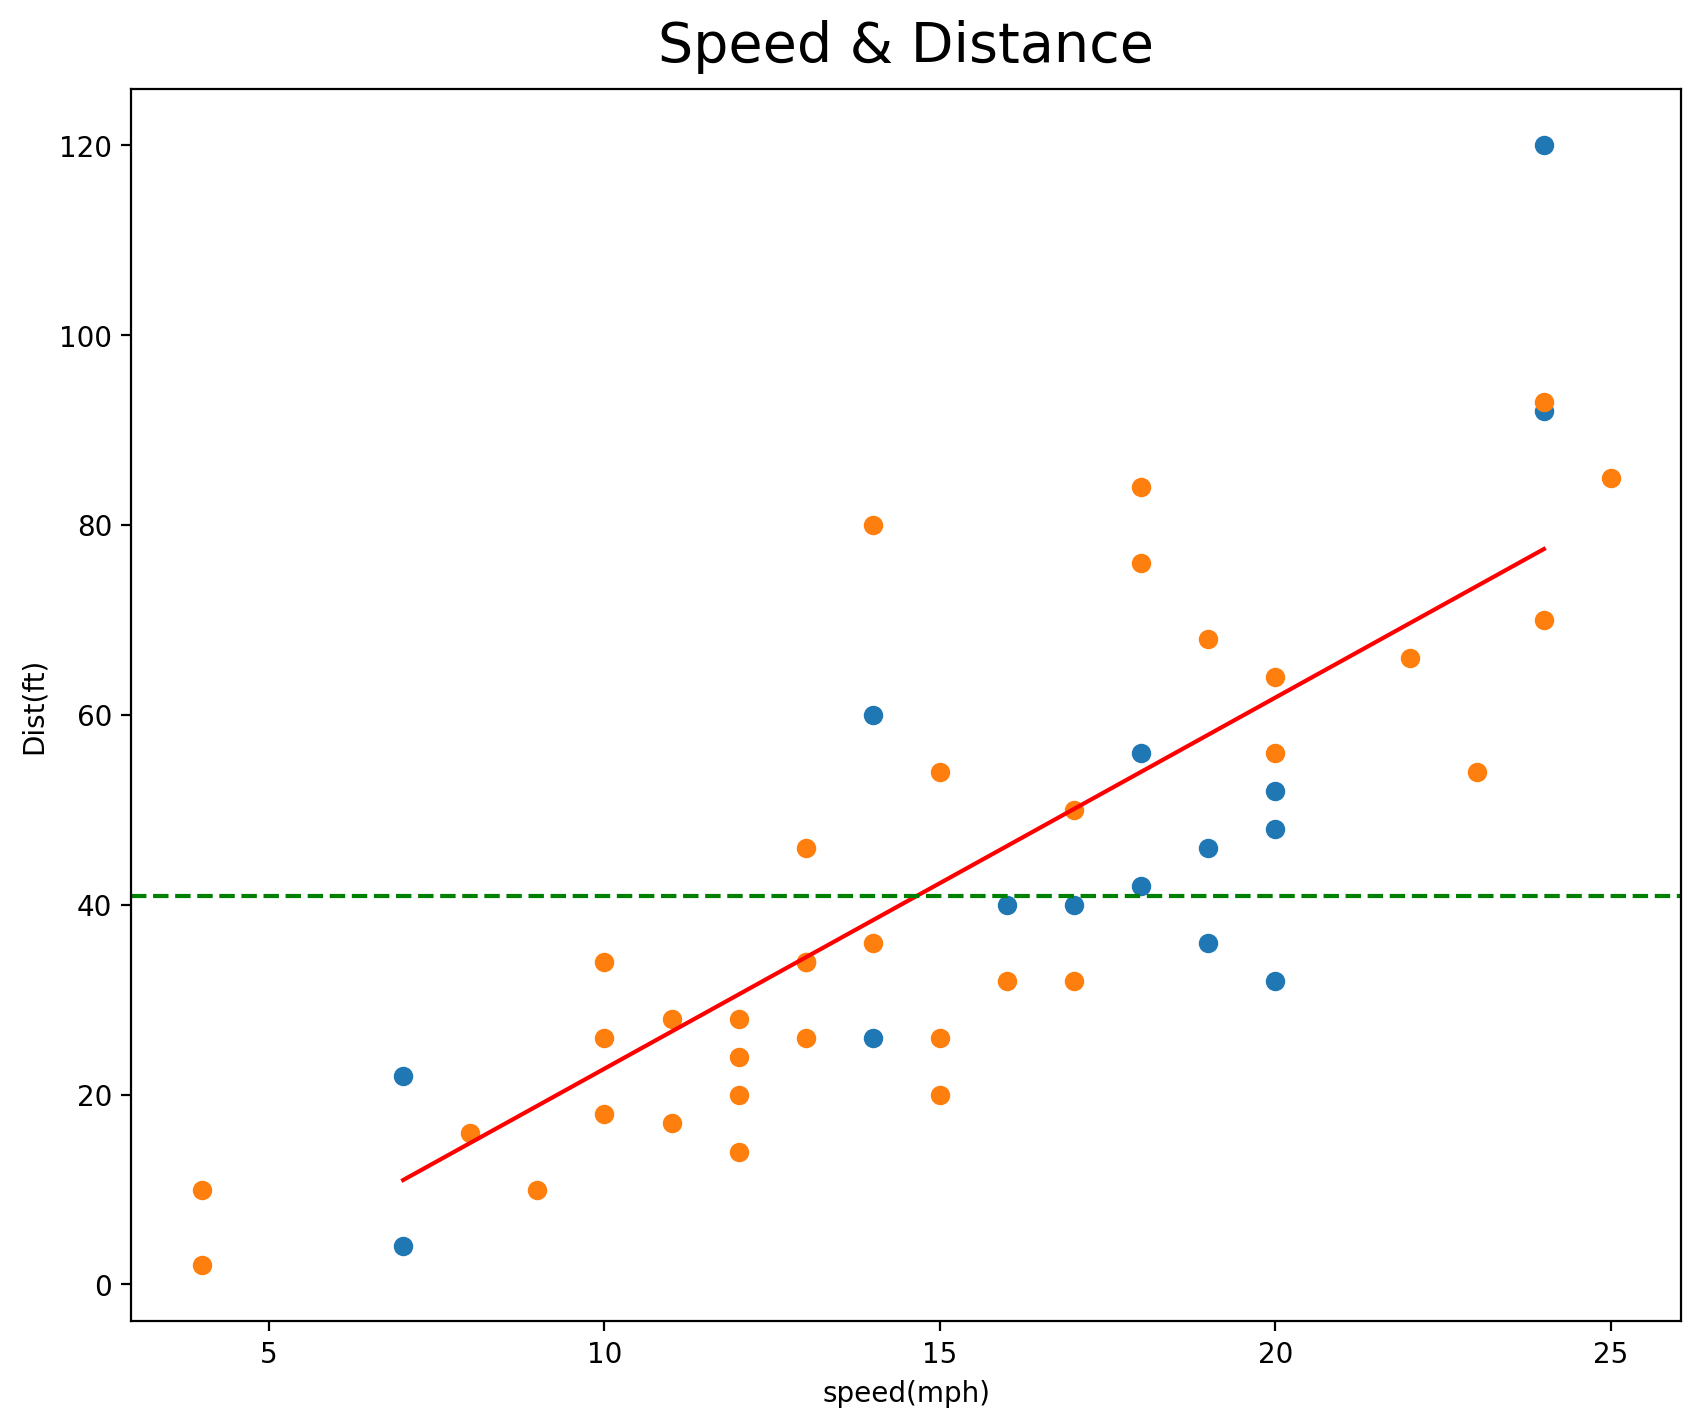

In [39]:
# 회귀선 표시
dist_mean = y_train.mean()
fig, axe = plt.subplots(figsize = (10,8))
axe.scatter(x_test, y_test)
axe.scatter(x_train, y_train)
axe.plot(speed, dist, color = 'r')
axe.axhline(dist_mean, color = 'g', linestyle = '--')
axe.set_title('Speed & Distance', size = 20, pad = 10)
axe.set_ylabel('Dist(ft)')
axe.set_xlabel('speed(mph)')
# 학습데이터에 대한 회귀선

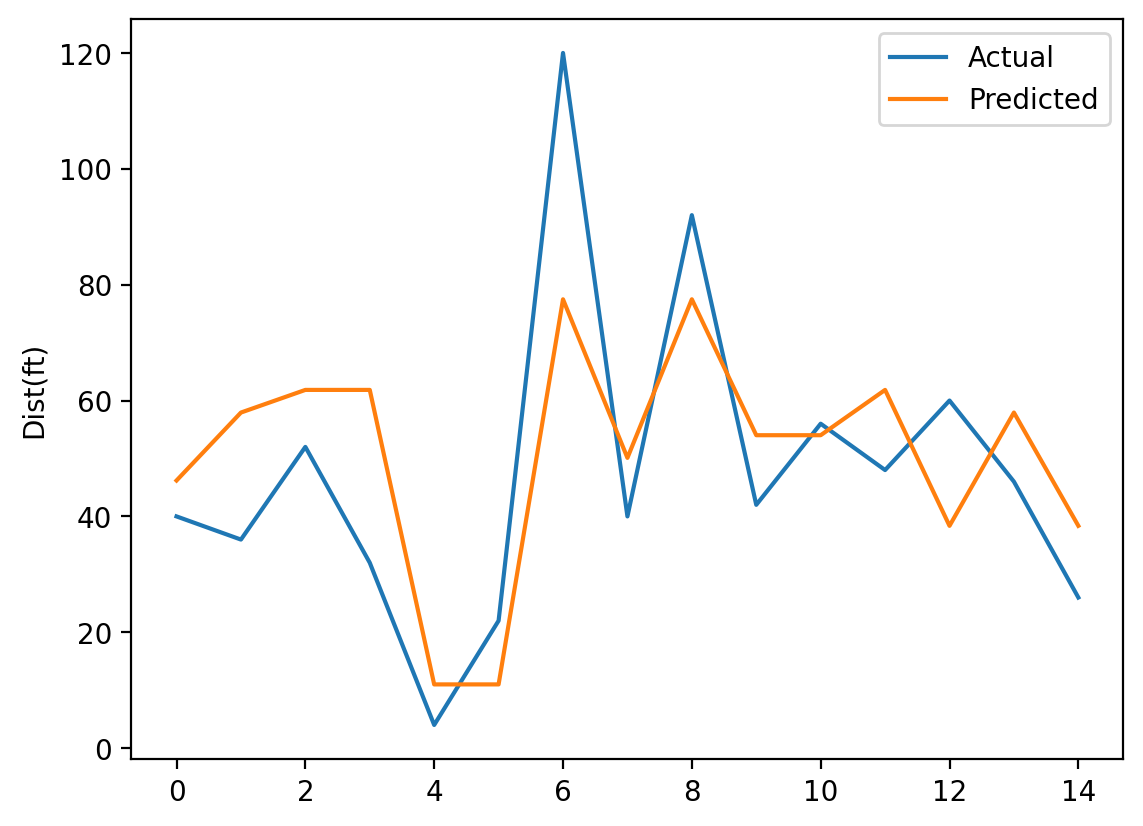

In [20]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Dist(ft)')
plt.show()